# <center>Organizaci&oacute;n de Datos</center>
### <center>R&aacute;eservas de Hotel: Grupo N°36 - Alan Taylor </center>

### <center>Integrantes:</center>
## <center>Ignacio Sebastián Oviedo</center>
## <center>Santiago Bautista Trezeguet</center>
## <center>Estefano Polizzi</center>

# <center>Organizaci&oacute;n de Datos</center>
### <center>R&aacute;eservas de Hotel: Grupo N°36 - Alan Taylor </center>

### <center>Integrantes:</center>
## <center>Ignacio Sebastián Oviedo</center>
## <center>Santiago Bautista Trezeguet</center>
## <center>Estefano Polizzi</center>

## Importamos librerias y abrimos dataset

In [1]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

data = pd.read_csv('./Datasets/hotels_train.csv')
data_test = pd.read_csv('./Datasets/hotels_test.csv')

## Analizamos los tipos de variable

In [2]:
data.dtypes.reset_index()

,index,0
0,hotel,object
1,lead_time,int64
2,arrival_date_year,int64
3,arrival_date_month,object
4,arrival_date_week_number,int64
5,arrival_date_day_of_month,int64
6,stays_in_weekend_nights,int64
7,stays_in_week_nights,int64
8,adults,int64
9,children,float64


Buscamos la media, mediana y moda de cada variable cuantitativa

In [3]:
columnas_numericas = data.select_dtypes(include=['int64', 'float64'])
nuevo_df = data[columnas_numericas.columns]

media = nuevo_df.mean()
mediana = nuevo_df.median()
moda = nuevo_df.mode().iloc[0]

resultados = pd.DataFrame({'Media': media, 'Mediana': mediana, 'Moda': moda})
resultados

,Media,Mediana,Moda
lead_time,112.248187,78.0,0.0
arrival_date_year,2016.154749,2016.0,2016.0
arrival_date_week_number,27.218080,28.0,33.0
arrival_date_day_of_month,15.785812,16.0,17.0
stays_in_weekend_nights,0.924135,1.0,0.0
stays_in_week_nights,2.510054,2.0,2.0
adults,1.862791,2.0,2.0
children,0.104896,0.0,0.0
babies,0.007155,0.0,0.0
is_repeated_guest,0.027991,0.0,0.0


Buscamos los posibles valores de cada variable cualitativa y su frecuencia

In [4]:
columnas_categoricas = data.select_dtypes(include=['object'])
nuevo_df = data[columnas_categoricas.columns]

for columna in columnas_categoricas:
    print(nuevo_df[columna].value_counts().reset_index())

    

          hotel  count
0    City Hotel  42129
1  Resort Hotel  19784
   arrival_date_month  count
0              August   7176
1                July   6524
2                 May   6159
3               April   5878
4             October   5863
5                June   5772
6           September   5619
7               March   4899
8            February   4125
9            December   3493
10           November   3404
11            January   3001
        meal  count
0         BB  47837
1         HB   7452
2         SC   5556
3  Undefined    591
4         FB    477
    country  count
0       PRT  27950
1       GBR   5733
2       FRA   4809
3       ESP   4210
4       DEU   3312
..      ...    ...
144     HND      1
145     FJI      1
146     LIE      1
147     ATA      1
148     RWA      1

[149 rows x 2 columns]
  market_segment  count
0      Online TA  29269
1  Offline TA/TO  12384
2         Groups  11545
3         Direct   5757
4      Corporate   2484
5  Complementary    359
6       Aviati

## Observamos la correlacion de las variables

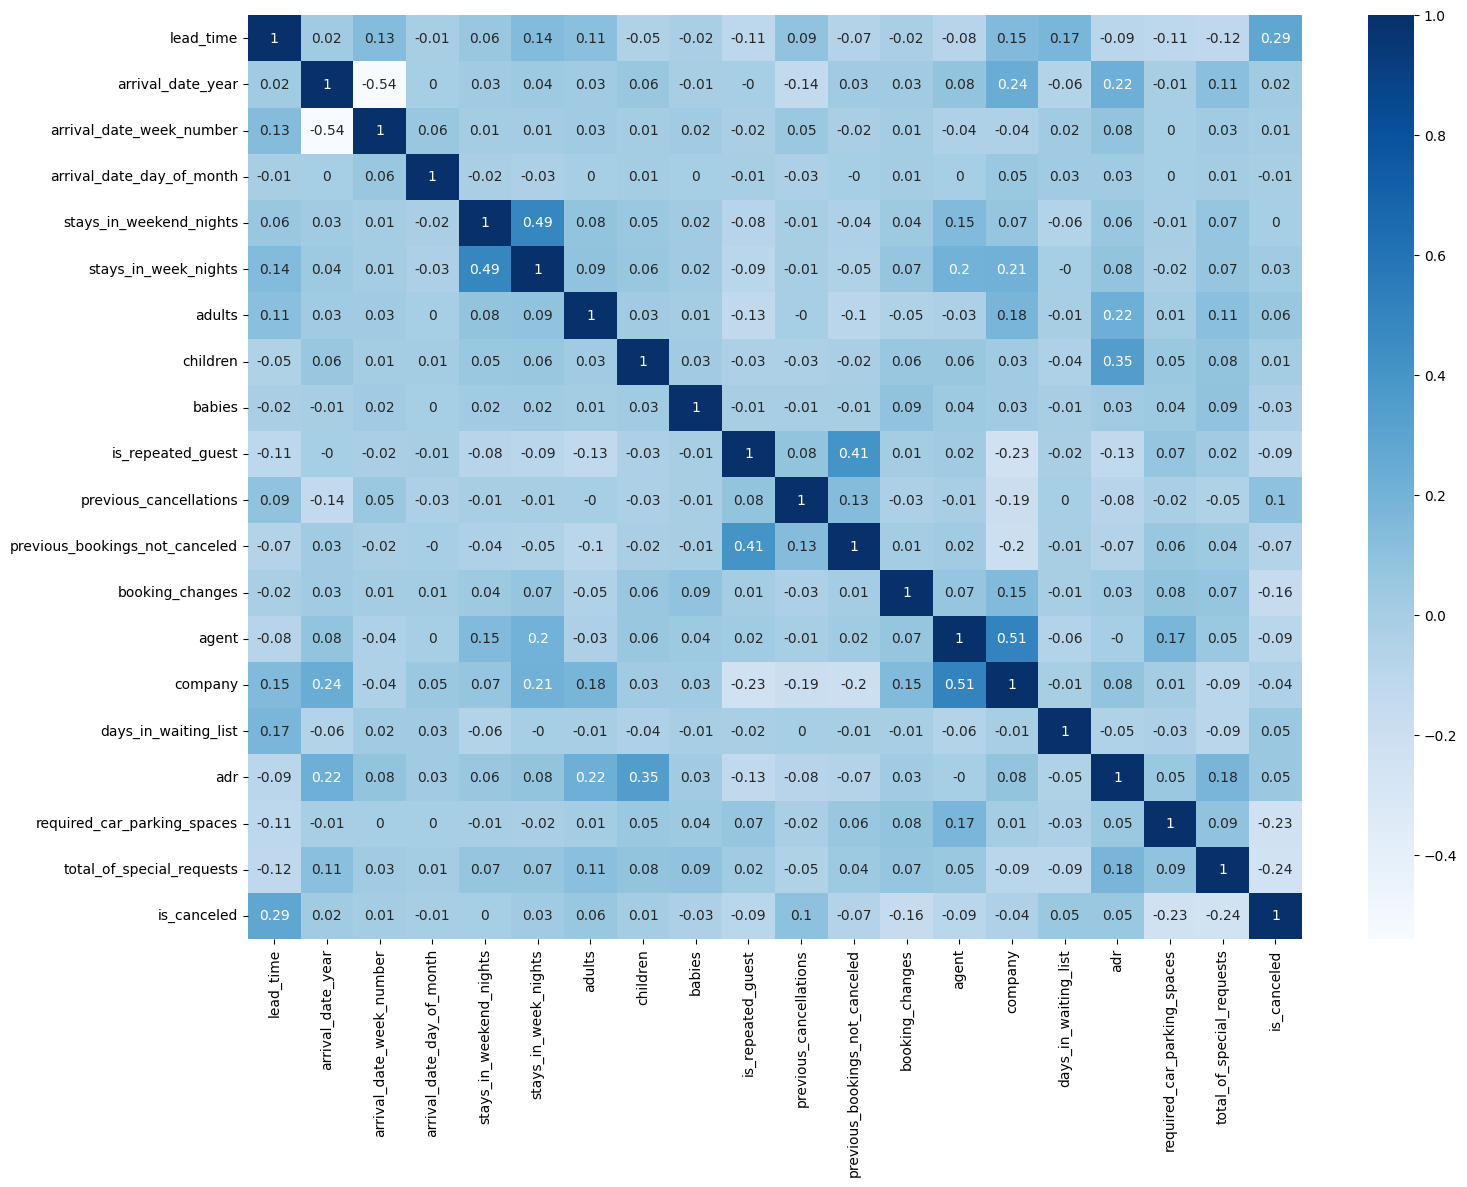

In [5]:
columnas_numericas = data.select_dtypes(include=['int64', 'float64'])
nuevo_df = data[columnas_numericas.columns]


plt.figure(figsize = (17,12))
correlacion = nuevo_df.corr()
sns.heatmap(correlacion.round(2), annot = True, cmap='Blues')
plt.show()

Grafico variables aparentemente relevantes

## Analizamos la relación de las variables con el target

Se toma como target a is_canceled por ser la variable a predecir

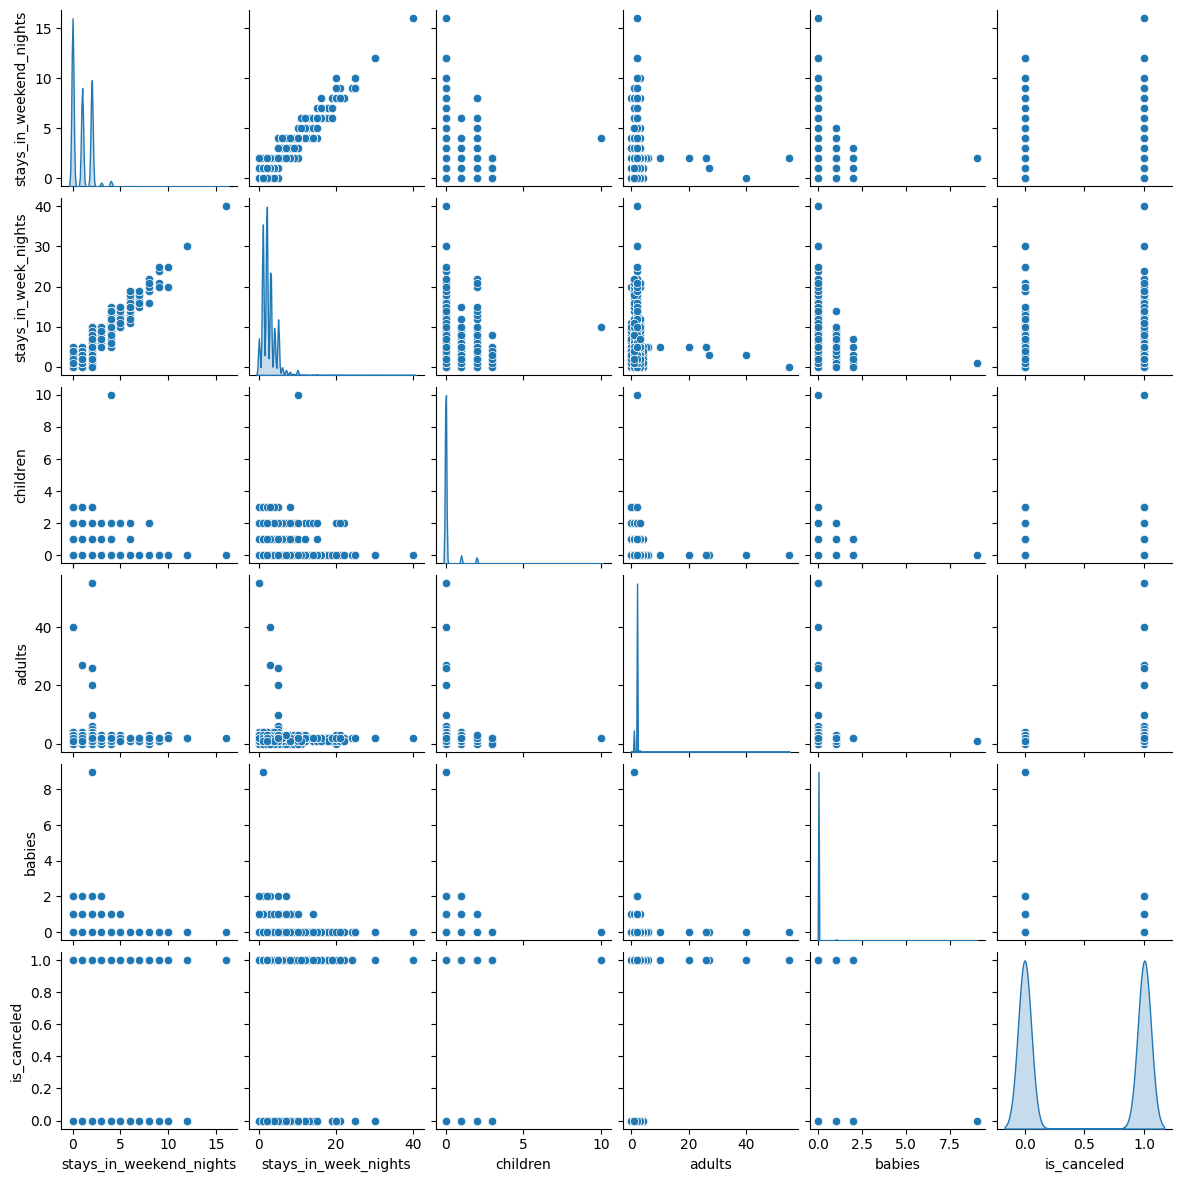

In [6]:
columnas = data[['stays_in_weekend_nights','stays_in_week_nights','children', 'adults', 'babies', 'is_canceled']]

sns.pairplot(columnas, diag_kind='kde', height=2)

plt.show()

Graficar distribucion de variables aparentemente poco relevantes

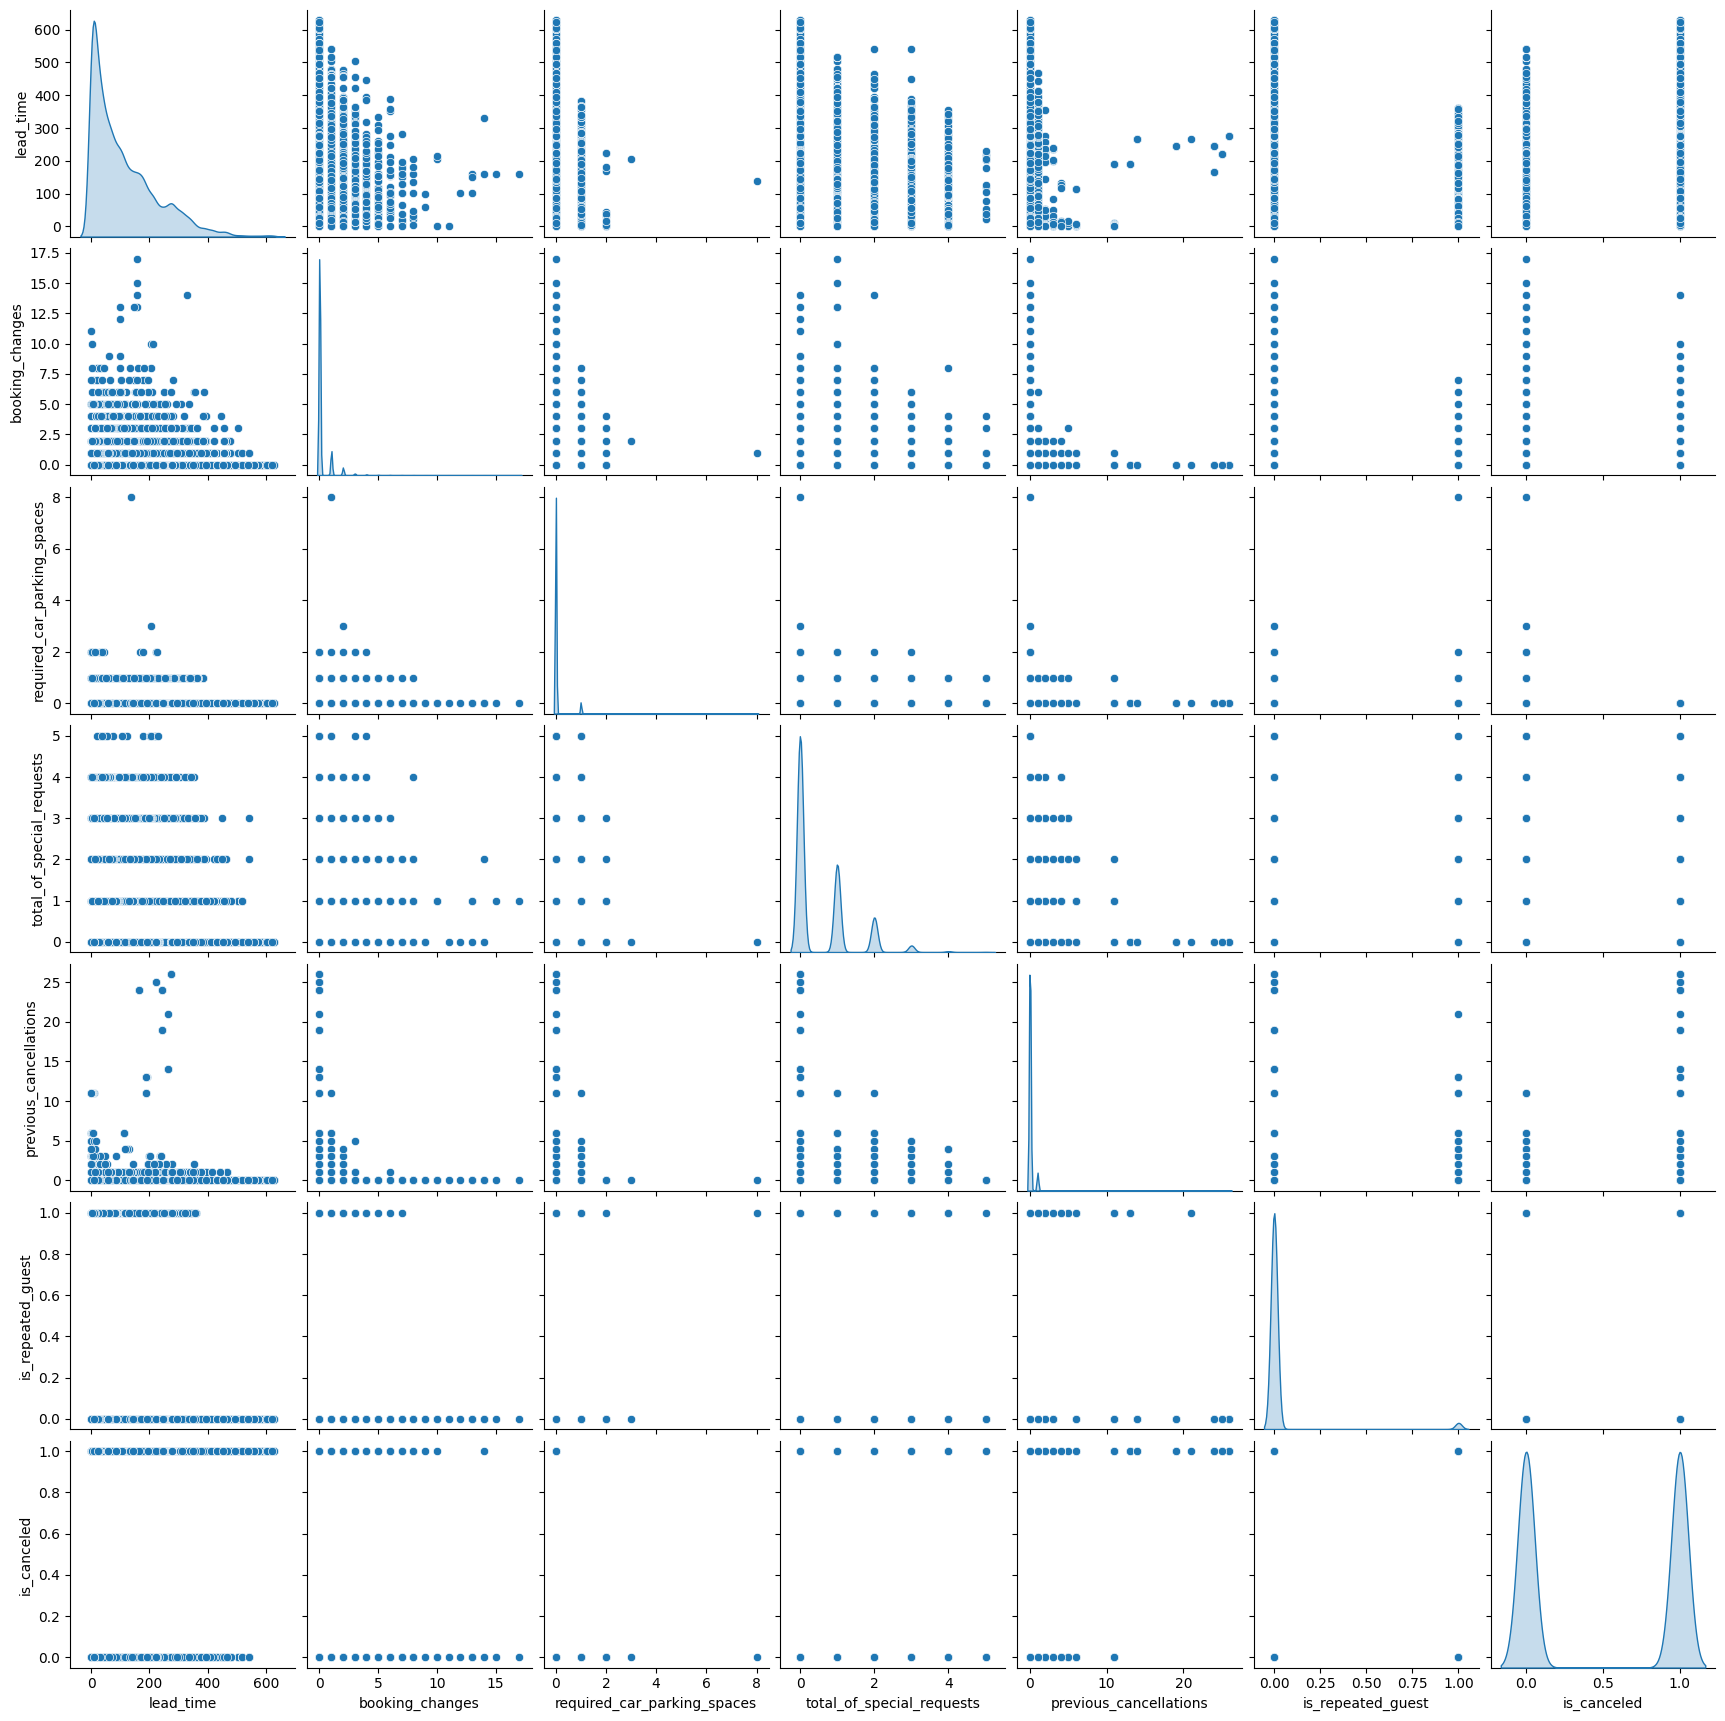

In [7]:
columnas = data[['lead_time', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 'previous_cancellations','is_repeated_guest', 'is_canceled']]


sns.pairplot(columnas, diag_kind='kde', height=2.5)

plt.show()

#### Analizamos paises 

In [8]:
porcentaje_cancelacion = data.groupby('country')['is_canceled'].mean() * 100

umbral_superior = 60
umbral_inferior = 40

# Encontramos países con porcentaje de cancelación superior al 60%
paises_arriba_60 = set(porcentaje_cancelacion[porcentaje_cancelacion > umbral_superior].index.tolist())

# Encontramos países con porcentaje de cancelación menor al 40%
paises_abajo_40 = set(porcentaje_cancelacion[porcentaje_cancelacion < umbral_inferior].index.tolist())

#### Analizamos la relacion de la reserva y asignación de habitación con el target

Grafico para visualizar los datos

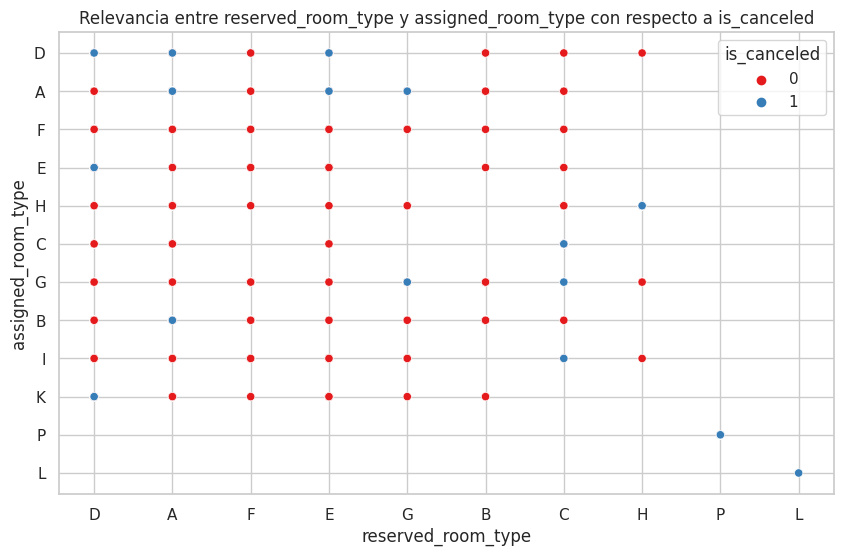

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

x_variable = 'reserved_room_type'
y_variable = 'assigned_room_type'

sns.scatterplot(data=data, x=x_variable, y=y_variable, hue="is_canceled", palette="Set1")

plt.title(f"Relevancia entre {x_variable} y {y_variable} con respecto a is_canceled")
plt.xlabel(x_variable)
plt.ylabel(y_variable)

plt.legend(title="is_canceled")

plt.show()

#### Analizamos variable deposit_type

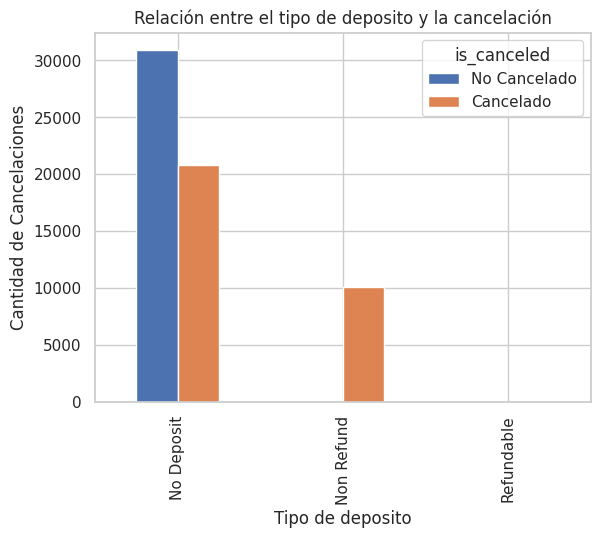

In [10]:
tabla_cruzada = pd.crosstab(data['deposit_type'], data['is_canceled'])
tabla_cruzada.plot(kind='bar', stacked=False)

plt.xlabel('Tipo de deposito')
plt.ylabel('Cantidad de Cancelaciones')
plt.title('Relación entre el tipo de deposito y la cancelación')

plt.legend(title='is_canceled' , labels=['No Cancelado', 'Cancelado'])
plt.show()

In [11]:
data = data[~data['deposit_type'].isin(['Refundable'])]
columna = ['deposit_type','is_canceled']
data[columna].value_counts()

deposit_type  is_canceled
No Deposit    0              30885
              1              20800
Non Refund    1              10113
              0                 37
Name: count, dtype: int64

#### Analisis variable arrival_date_month

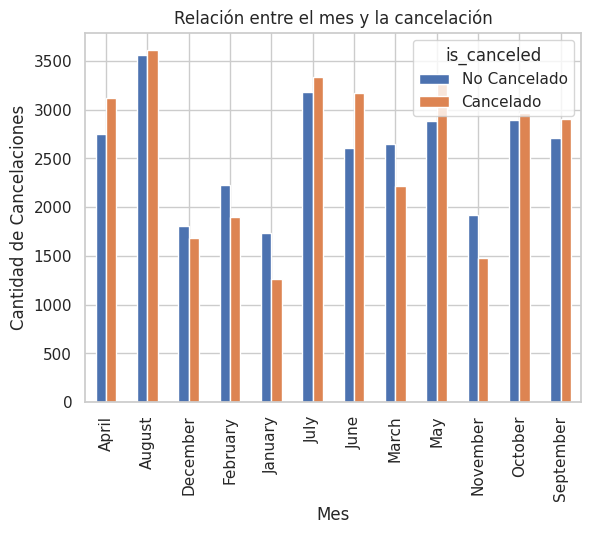

In [12]:
tabla_cruzada = pd.crosstab(data['arrival_date_month'], data['is_canceled'])
tabla_cruzada.plot(kind='bar', stacked=False)

plt.xlabel('Mes')
plt.ylabel('Cantidad de Cancelaciones')
plt.title('Relación entre el mes y la cancelación')

plt.legend(title='is_canceled', labels=['No Cancelado', 'Cancelado'])
plt.show()


Teniendo en cuenta esto observamos los porcentajes de cancelación

In [13]:
porcentaje_cancelacion = data.groupby('arrival_date_month')['is_canceled'].mean() * 100
porcentaje_cancelacion

arrival_date_month
April        53.158522
August       50.313676
December     48.296593
February     45.987879
January      42.185938
July         51.120319
June         54.895165
March        45.538651
May          53.035976
November     43.562610
October      50.682827
September    51.798433
Name: is_canceled, dtype: float64

#### Analizamos variable customer_type

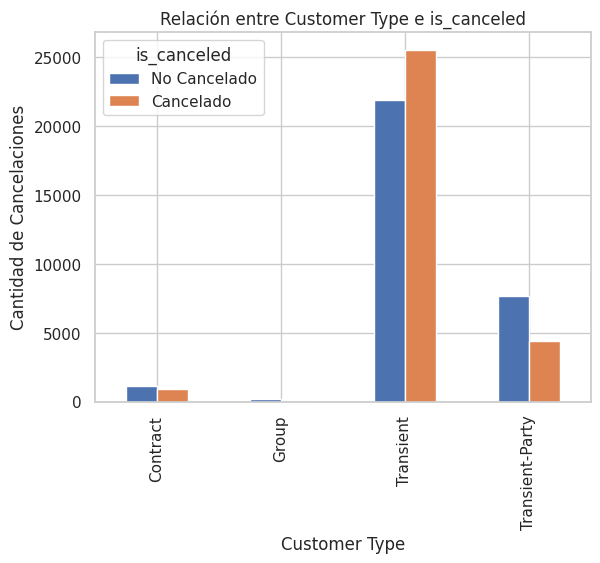

In [14]:
tabla_cruzada = pd.crosstab(data['customer_type'], data['is_canceled'])

tabla_cruzada.plot(kind='bar', stacked=False)

plt.xlabel('Customer Type')
plt.ylabel('Cantidad de Cancelaciones')
plt.title('Relación entre Customer Type e is_canceled')

plt.legend(title='is_canceled', labels=['No Cancelado', 'Cancelado'])
plt.show()

In [15]:
data = data[~data['customer_type'].isin(['Group'])]
columna = ['customer_type','is_canceled']
data[columna].value_counts()

customer_type    is_canceled
Transient        1              25567
                 0              21864
Transient-Party  0               7688
                 1               4423
Contract         0               1155
                 1                877
Name: count, dtype: int64

Borramos variables de distribution channel que no aportan información significativa

#### Analisis distribution_channel

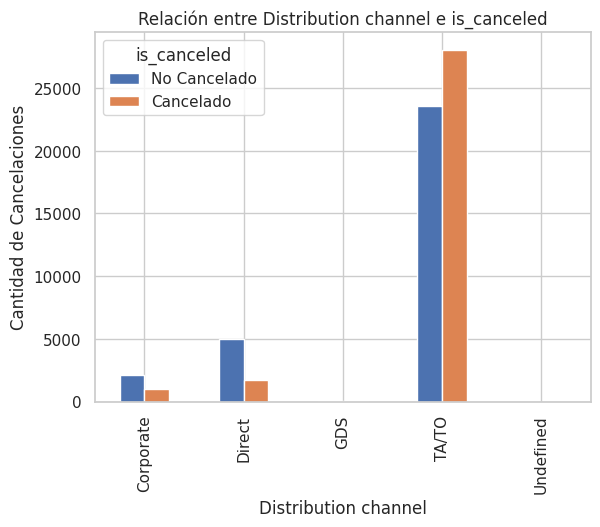

In [16]:
tabla_cruzada = pd.crosstab(data['distribution_channel'], data['is_canceled'])

tabla_cruzada.plot(kind='bar', stacked=False)

plt.xlabel('Distribution channel')
plt.ylabel('Cantidad de Cancelaciones')
plt.title('Relación entre Distribution channel e is_canceled')

plt.legend(title='is_canceled', labels=['No Cancelado', 'Cancelado'])
plt.show()

In [17]:
data = data[~data['distribution_channel'].isin(['Undefined'])]
columna = ['distribution_channel','is_canceled']
data[columna].value_counts()

distribution_channel  is_canceled
TA/TO                 1              28062
                      0              23560
Direct                0               4961
Corporate             0               2123
Direct                1               1742
Corporate             1               1033
GDS                   0                 63
                      1                 26
Name: count, dtype: int64

#### Analisis market_segment

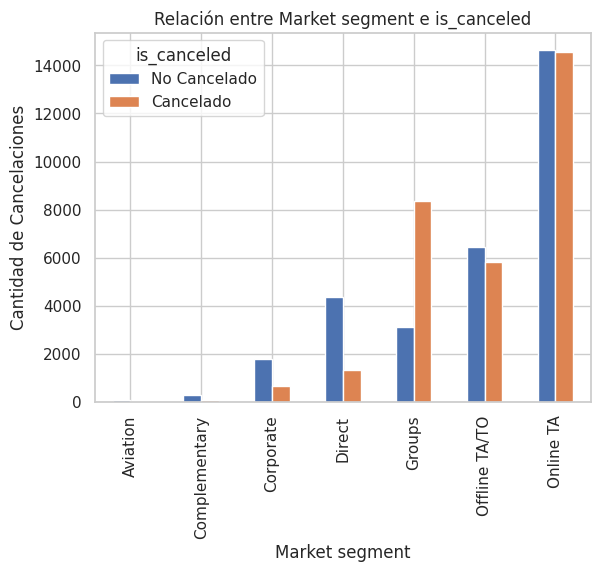

In [18]:
tabla_cruzada = pd.crosstab(data['market_segment'], data['is_canceled'])

tabla_cruzada.plot(kind='bar', stacked=False)

plt.xlabel('Market segment')
plt.ylabel('Cantidad de Cancelaciones')
plt.title('Relación entre Market segment e is_canceled')

plt.legend(title='is_canceled', labels=['No Cancelado', 'Cancelado'])
plt.show()

In [19]:
data = data[~data['market_segment'].isin(['Undefined'])]
columna = ['market_segment','is_canceled']
data[columna].value_counts()

market_segment  is_canceled
Online TA       0              14629
                1              14539
Groups          1               8374
Offline TA/TO   0               6453
                1               5836
Direct          0               4376
Groups          0               3110
Corporate       0               1780
Direct          1               1317
Corporate       1                687
Complementary   0                283
Aviation        0                 76
Complementary   1                 73
Aviation        1                 37
Name: count, dtype: int64

Borramos undefined por misma razón que en variables anteriores

#### Analizamos variable total_of_special_requests

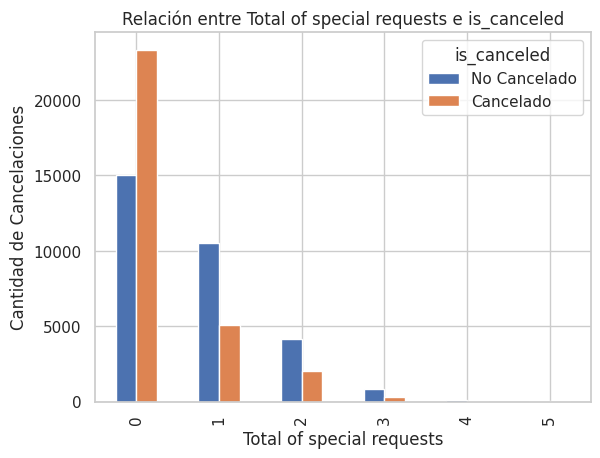

In [20]:
tabla_cruzada = pd.crosstab(data['total_of_special_requests'], data['is_canceled'])

tabla_cruzada.plot(kind='bar', stacked=False)

plt.xlabel('Total of special requests')
plt.ylabel('Cantidad de Cancelaciones')
plt.title('Relación entre Total of special requests e is_canceled')

plt.legend(title='is_canceled', labels=['No Cancelado', 'Cancelado'])
plt.show()

In [21]:
columna = ['total_of_special_requests','is_canceled']
data[columna].value_counts()

total_of_special_requests  is_canceled
0                          1              23361
                           0              15053
1                          0              10501
                           1               5108
2                          0               4158
                           1               2035
3                          0                855
                           1                330
4                          0                123
                           1                 27
5                          0                 17
                           1                  2
Name: count, dtype: int64

#### Analizamos la variable meal

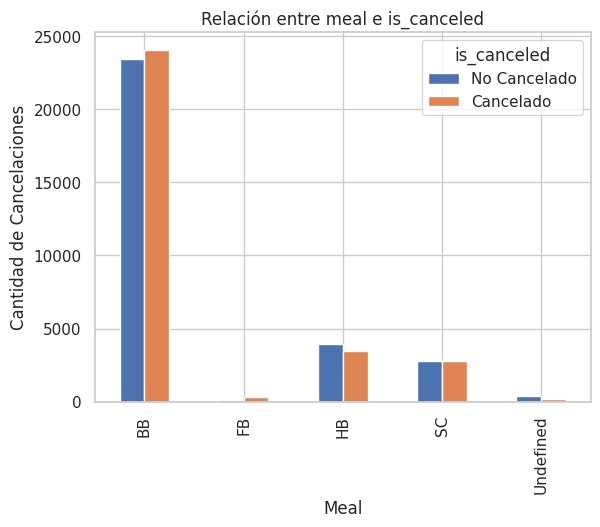

In [22]:
tabla_cruzada = pd.crosstab(data['meal'], data['is_canceled'])

tabla_cruzada.plot(kind='bar', stacked=False)

plt.xlabel('Meal')
plt.ylabel('Cantidad de Cancelaciones')
plt.title('Relación entre meal e is_canceled')

plt.legend(title='is_canceled', labels=['No Cancelado', 'Cancelado'])
plt.show()

In [23]:
data = data[~data['meal'].isin(['Undefined'])]
columna = ['meal','is_canceled']
data[columna].value_counts()

meal  is_canceled
BB    1              24078
      0              23459
HB    0               3953
      1               3478
SC    0               2769
      1               2767
FB    1                333
      0                143
Name: count, dtype: int64

### Analizamos agent

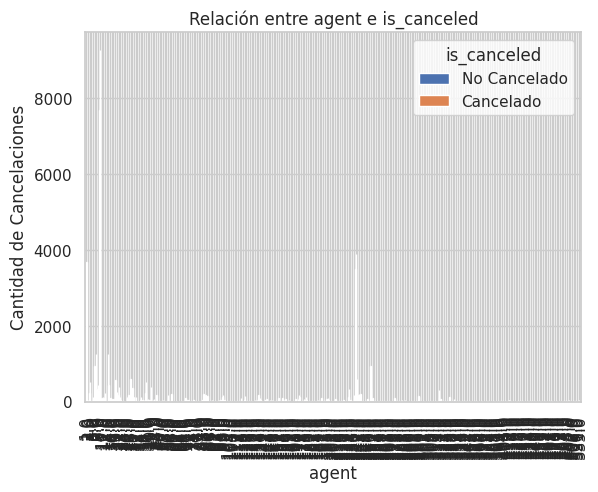

In [24]:
tabla_cruzada = pd.crosstab(data['agent'], data['is_canceled'])

tabla_cruzada.plot(kind='bar', stacked=False)

plt.xlabel('agent')
plt.ylabel('Cantidad de Cancelaciones')
plt.title('Relación entre agent e is_canceled')

plt.legend(title='is_canceled', labels=['No Cancelado', 'Cancelado'])
plt.show()

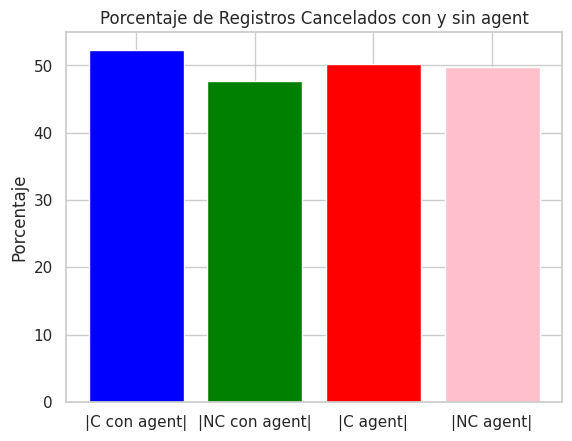

In [25]:
df_sin_nulos = data[data['agent'].notna()] 

porcentaje_cancelados_con_agent = (df_sin_nulos[df_sin_nulos['is_canceled'] == 1].shape[0] / df_sin_nulos.shape[0]) * 100
porcentaje_no_cancelados_con_agent = (df_sin_nulos[df_sin_nulos['is_canceled'] == 0].shape[0] / df_sin_nulos.shape[0]) * 100
porcentaje_cancelados_sin_agent = (data[data['is_canceled'] == 1].shape[0] / data.shape[0]) * 100
porcentaje_no_cancelados_sin_agent = (data[data['is_canceled'] == 0].shape[0] / data.shape[0]) * 100

plt.bar(['|C con agent|', '|NC con agent|', '|C agent|', '|NC agent|'], [porcentaje_cancelados_con_agent, porcentaje_no_cancelados_con_agent, porcentaje_cancelados_sin_agent, porcentaje_no_cancelados_sin_agent], color=['blue', 'green', 'red', 'pink'])

plt.title('Porcentaje de Registros Cancelados con y sin agent')
plt.ylabel('Porcentaje')
plt.show()

### Analizamos company


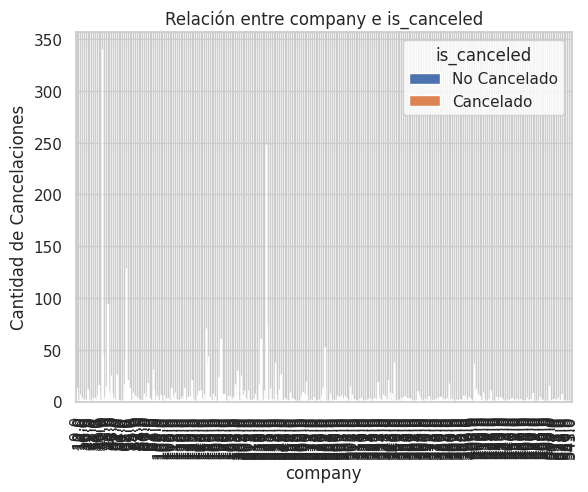

In [26]:
tabla_cruzada = pd.crosstab(data['company'], data['is_canceled'])

tabla_cruzada.plot(kind='bar', stacked=False)

plt.xlabel('company')
plt.ylabel('Cantidad de Cancelaciones')
plt.title('Relación entre company e is_canceled')

plt.legend(title='is_canceled', labels=['No Cancelado', 'Cancelado'])
plt.show()

Se analiza si la variable company resulta relevante, para eso la tomo como si fuera una variable booleana e intento ver si hay diferencia entre los registros que tienen alguna compania y los que no

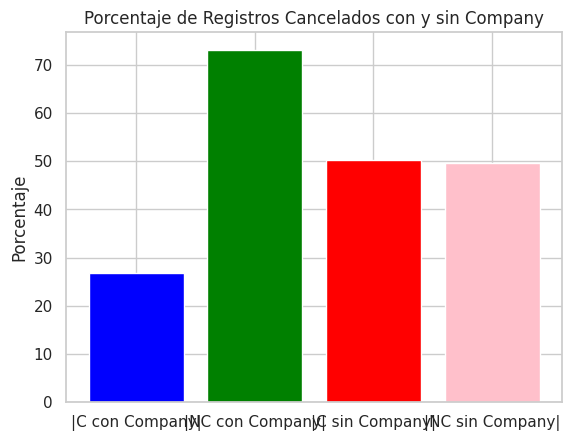

In [27]:
df_sin_nulos = data[data['company'].notna()] 

porcentaje_cancelados_con_company = (df_sin_nulos[df_sin_nulos['is_canceled'] == 1].shape[0] / df_sin_nulos.shape[0]) * 100
porcentaje_no_cancelados_con_company = (df_sin_nulos[df_sin_nulos['is_canceled'] == 0].shape[0] / df_sin_nulos.shape[0]) * 100
porcentaje_cancelados_sin_company = (data[data['is_canceled'] == 1].shape[0] / data.shape[0]) * 100
porcentaje_no_cancelados_sin_company = (data[data['is_canceled'] == 0].shape[0] / data.shape[0]) * 100

plt.bar(['|C con Company|', '|NC con Company|', '|C sin Company|', '|NC sin Company|'], [porcentaje_cancelados_con_company, porcentaje_no_cancelados_con_company, porcentaje_cancelados_sin_company, porcentaje_no_cancelados_sin_company], color=['blue', 'green', 'red', 'pink'])

plt.title('Porcentaje de Registros Cancelados con y sin Company')
plt.ylabel('Porcentaje')
plt.show()

## Preprocesamiento


### Agregamos variables nuevas

Agrego variable booleana que me dice si la habitacion reservada es distinta a la asignada

In [28]:
data['change_room'] = np.where(data['reserved_room_type'] != data['assigned_room_type'], 1,0)

data_test['change_room'] = np.where(data_test['reserved_room_type'] != data_test['assigned_room_type'], 1,0)

Concluimos en convertir la variable company a una variable booleana

In [29]:
data.loc[data['company'].notna(), 'company'] = 1 #Es 1 cuando es una reserva procedente de una compania
data['company'] = data['company'].fillna(0) #Es 0 si no es de una compania

data_test.loc[data_test['company'].notna(), 'company'] = 1 
data_test['company'] = data_test['company'].fillna(0)

##### Cambiamos variable de cantidad de noches en estadia, a una sola variable por simplicidad

In [31]:
data['nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data = data.drop('stays_in_weekend_nights', axis=1)
data = data.drop('stays_in_week_nights', axis=1)

data_test['nights'] = data_test['stays_in_weekend_nights'] + data_test['stays_in_week_nights']
data_test = data_test.drop('stays_in_weekend_nights', axis=1)
data_test = data_test.drop('stays_in_week_nights', axis=1)

Para mejor entendimiento de la variable country, vamos a hacer dos variables most_canceled_country y less_canceled_country

In [32]:
#most_canceled_country, less_canceled_country

def pais_alta_cancelacion(pais):
    if pais in paises_arriba_60:
        return 1
    else:
        return 0
    
def pais_baja_cancelacion(pais):
    if pais in paises_abajo_40:
        return 1
    else:
        return 0
    
data['most_canceled_country'] = data['country'].apply(pais_alta_cancelacion)
data['less_canceled_country'] = data['country'].apply(pais_baja_cancelacion)

data_test['most_canceled_country'] = data_test['country'].apply(pais_alta_cancelacion)
data_test['less_canceled_country'] = data_test['country'].apply(pais_baja_cancelacion)

Hacemos dummies con algunas variables para mayor entendimiento del modelo

In [33]:
data = pd.get_dummies(data, columns=["customer_type","deposit_type","distribution_channel","market_segment","hotel","arrival_date_month","meal"], drop_first=True)

data_test = pd.get_dummies(data_test, columns=["customer_type","deposit_type","distribution_channel","market_segment","hotel","arrival_date_month","meal"], drop_first=True)


Cambiamos children y babies, por una sola variable minors

In [34]:
data['minors'] = data['children'] + data['babies']
data = data.drop('children', axis=1)
data = data.drop('babies', axis=1)

data_test['minors'] = data_test['children'] + data_test['babies']
data_test = data_test.drop('children', axis=1)
data_test = data_test.drop('babies', axis=1)

### Analisis de variables nulas

Verificamos si hay columnas nulas para eliminarlas en ese caso

In [35]:
columnas_nulas = data.columns[data.isna().all()]
columnas_nulas

Index([], dtype='object')

Vemos el porcentaje de nulls para las columnas con al menos 1 null

In [36]:
filas_totales = data.shape[0]
columnas_con_nulos = data.columns[data.isna().any()]
nuevo_df = data[columnas_con_nulos]
print(nuevo_df.isna().sum()/filas_totales*100)

filas_totales = data_test.shape[0]
columnas_con_nulos = data_test.columns[data_test.isna().any()]
nuevo_df = data[columnas_con_nulos]

country     0.355854
agent      12.510659
dtype: float64


Imputamos valores nulos de agent con un valor optimo de predicción

In [37]:
data['agent'].fillna(3, inplace=True)

data_test['agent'].fillna(3, inplace=True)

### Eliminamos variables 


Borramos columnas del test que no existen en el data original

In [38]:
data_test = data_test.drop('customer_type_Group', axis=1)
data_test = data_test.drop('deposit_type_Refundable', axis=1)
data_test = data_test.drop('meal_Undefined', axis=1)

Eliminamos variable country

In [39]:
data = data.drop('country', axis=1)

data_test = data_test.drop('country', axis=1)

Elimino variables de reserva y asignacion

In [40]:
data = data.drop('reserved_room_type', axis=1)
data = data.drop('assigned_room_type', axis=1)

data_test = data_test.drop('reserved_room_type', axis=1)
data_test = data_test.drop('assigned_room_type', axis=1)

## Borramos registros irrelevantes

#### Analizamos valores mal cargados y filtro data

In [41]:
data.dropna(inplace=True)

## Analisis outliers

Comenzamos a visualizar los distintos valores de algunas variables, para detectar valores atipicos.

#### Analisis lead_time

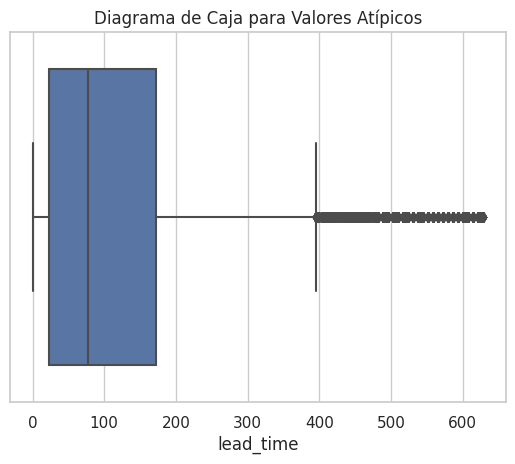

In [42]:
Q1 = data['lead_time'].quantile(0.25)
Q3 = data['lead_time'].quantile(0.75)

IQR = Q3 - Q1

umbral_inferior = Q1 - 3 * IQR
umbral_superior = Q3 + 3 * IQR

valores_atipicos = data[(data['lead_time'] < umbral_inferior) | (data['lead_time'] > umbral_superior)]


sns.boxplot(x=data['lead_time'])
plt.xlabel('lead_time')
plt.title('Diagrama de Caja para Valores Atípicos')

plt.show()

Luego borramos outliers de lead_time pero primero observamos la cantidad de filas para verificar cantidad de filas eliminadas.

In [43]:
data.shape

(60980, 48)

Vamos a calcular Z-score modificado de la variable lead_time 

In [44]:
mediana =  data['lead_time'].median()
mad = np.median(np.abs(data['lead_time']-mediana))
z_score_modificado = 0.6745 * (data['lead_time']-mediana)/mad

umbral = 3.5

data['z_score_modificado'] = z_score_modificado

data = data[~(data['z_score_modificado'].abs() > umbral)] #Los que son mayores al umbral son outliers

data = data.drop('z_score_modificado', axis=1)

data.shape


(59902, 48)

#### Analisis nights

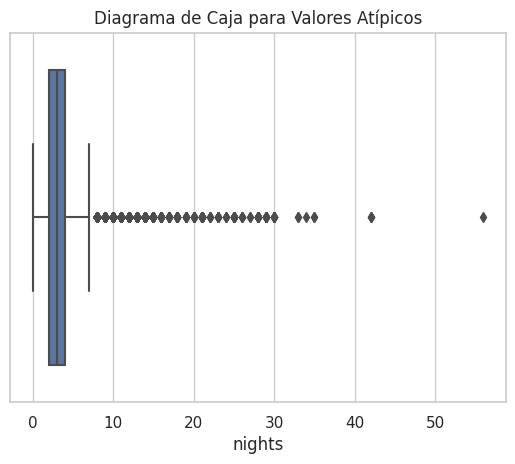

In [45]:
Q1 = data['nights'].quantile(0.25)
Q3 = data['nights'].quantile(0.75)

IQR = Q3 - Q1

umbral_inferior = Q1 - 3 * IQR
umbral_superior = Q3 + 3 * IQR

valores_atipicos = data[(data['nights'] < umbral_inferior) | (data['nights'] > umbral_superior)]


sns.boxplot(x=data['nights'])
plt.xlabel('nights')
plt.title('Diagrama de Caja para Valores Atípicos')

plt.show()

Repetimos el mismo procedimiento que con lead_time

In [46]:
mediana =  data['nights'].median()
mad = np.median(np.abs(data['nights']-mediana))
z_score_modificado = 0.6745 * (data['nights']-mediana)/mad

umbral = 3.5

data['z_score_modificado'] = z_score_modificado

outliers = data[z_score_modificado.abs() > umbral]

data = data[~(data['z_score_modificado'].abs() > umbral)] #Los que son mayores al umbral son outliers

data = data.drop('z_score_modificado', axis=1)

data.shape

(57840, 48)

#### Analizamos days_in_waiting_list

Ignoramos los que esperaron 0 dias, ya que influye en la visualizacion de outliers (porque son la gran mayoria)

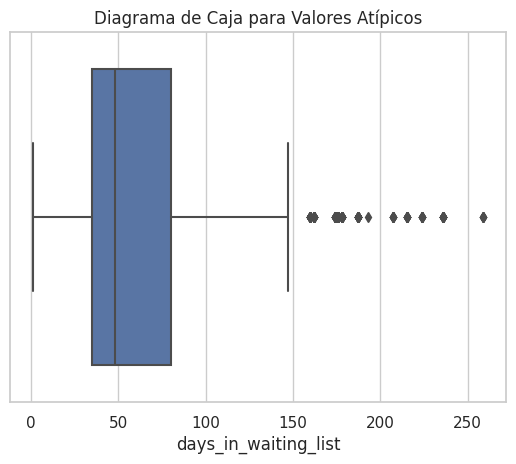

In [47]:
data_sin_ceros = data[data['days_in_waiting_list'] != 0] 

Q1 = data_sin_ceros['days_in_waiting_list'].quantile(0.25)
Q3 = data_sin_ceros['days_in_waiting_list'].quantile(0.75)

IQR = Q3 - Q1

umbral_inferior = Q1 - 3 * IQR
umbral_superior = Q3 + 3 * IQR

valores_atipicos = data_sin_ceros[(data_sin_ceros['days_in_waiting_list'] < umbral_inferior) | (data_sin_ceros['days_in_waiting_list'] > umbral_superior)]


sns.boxplot(x=data_sin_ceros['days_in_waiting_list'])
plt.xlabel('days_in_waiting_list')
plt.title('Diagrama de Caja para Valores Atípicos')

plt.show()

In [48]:
columnas = ['days_in_waiting_list', 'is_canceled']
data[columnas].value_counts().head(30)

days_in_waiting_list  is_canceled
0                     0              28552
                      1              27214
39                    1                126
31                    1                 90
58                    0                 82
44                    1                 75
46                    1                 66
35                    1                 58
69                    1                 55
62                    1                 47
45                    1                 46
3                     1                 41
41                    1                 40
111                   1                 39
87                    0                 36
22                    1                 35
101                   1                 34
28                    1                 34
91                    1                 33
93                    1                 31
50                    1                 31
17                    1                 27
38                  

Acá se observa que la mayoría que espera considerablemente varios dias es muy probable que cancelen

Ahora vamos a encontrar los outliers y para no borrar filas, le cambiamos el valor para que no sean considerados como outliers pero que esperaron considerablemente varios dias

In [49]:
mediana =  data_sin_ceros['days_in_waiting_list'].median()
mad = np.median(np.abs(data_sin_ceros['days_in_waiting_list']-mediana))
z_score_modificado = 0.6745 * (data_sin_ceros['days_in_waiting_list']-mediana)/mad

umbral = 3.5

data_sin_ceros['z_score_modificado'] = z_score_modificado

outliers = data_sin_ceros[z_score_modificado.abs() > umbral]

valor_por_defecto = 150

data.loc[outliers.index, 'days_in_waiting_list'] = valor_por_defecto


/tmp/ipykernel_2465/2680457186.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sin_ceros['z_score_modificado'] = z_score_modificado


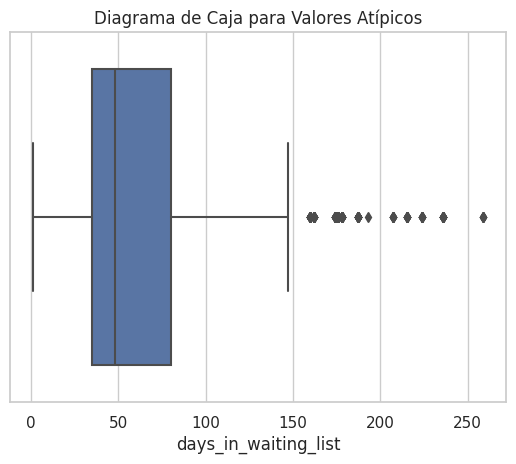

In [50]:
Q1 = data_sin_ceros['days_in_waiting_list'].quantile(0.25)
Q3 = data_sin_ceros['days_in_waiting_list'].quantile(0.75)

IQR = Q3 - Q1

umbral_inferior = Q1 - 3 * IQR
umbral_superior = Q3 + 3 * IQR

valores_atipicos = data_sin_ceros[(data_sin_ceros['days_in_waiting_list'] < umbral_inferior) | (data_sin_ceros['days_in_waiting_list'] > umbral_superior)]


sns.boxplot(x=data_sin_ceros['days_in_waiting_list'])
plt.xlabel('days_in_waiting_list')
plt.title('Diagrama de Caja para Valores Atípicos')
plt.show()

Se comprueba que ya no hay valores atipicos

#### Analizamos adults y minors, al ser dos variables utilizamos la distancia de mahalanobis

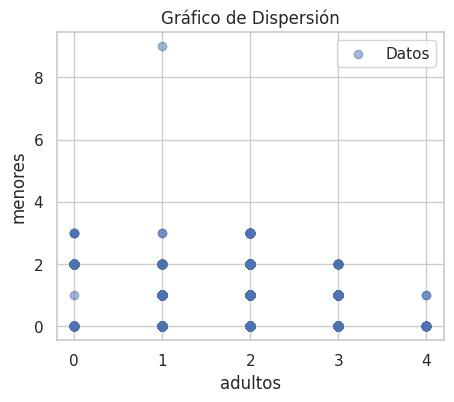

In [51]:
variable_x = data['adults']
variable_y = data['minors']

plt.figure(figsize=(5, 4))
plt.scatter(variable_x, variable_y, alpha=0.5, label='Datos')

valores_atipicos_originales = data[(variable_y > variable_x)]

valores_atipicos_faltan_adultos = data[(variable_x == 0) & (variable_y > 0)]

plt.xlabel('adultos')
plt.ylabel('menores')
plt.title('Gráfico de Dispersión')
plt.legend()
plt.grid(True)

plt.show()


Parecen existir variables anómalas

In [52]:
variables = ['adults', 'minors']
data_subset = data[variables]

vmedias = np.mean(data_subset)

cov = data_subset.cov().values

inv_cov = np.linalg.inv(cov)

mahalanobis_distances = []
for index, row in data_subset.iterrows():
    x_dif = row - vmedias
    mahal = np.dot(np.dot(x_dif, inv_cov), x_dif)
    mahalanobis_distances.append(mahal)


data['mahalanobis'] = mahalanobis_distances
data.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,...,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,minors,mahalanobis
0,49,2016,37,5,1,0,0,0,0,9.0,...,False,False,False,False,True,False,False,False,0.0,5.636100
1,4,2015,44,31,2,0,0,0,0,3.0,...,False,False,False,True,False,False,False,False,0.0,10.397965
2,25,2016,42,13,2,0,0,0,0,9.0,...,False,False,False,True,False,False,False,False,2.0,9.934785
3,26,2016,51,12,2,0,0,0,0,154.0,...,False,False,False,False,False,False,False,False,0.0,10.397965
4,104,2017,12,19,2,0,0,0,0,20.0,...,True,False,False,False,False,False,False,False,0.0,10.397965


Al parecer el valor de las distancias de mahalanobis de los datos están entre 5 y 9

Ahora observamos la media real, y buscamos las distancias ánomalas

In [53]:
media = np.mean(mahalanobis_distances)
print("La moda de las distancias de Mahalanobis es:", media)
desviacion_estandar = np.std(mahalanobis_distances)

umbral = 3 * desviacion_estandar

distancias_anomalas = [distancia for distancia in mahalanobis_distances if distancia > umbral]

print("Distancias anómalas:", distancias_anomalas)

La moda de las distancias de Mahalanobis es: 9.944403398877892
Distancias anómalas: [23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 17.21330220861921, 23.644758422090735, 23.644758422090735, 27.106537107657005, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 17.21330220861921, 23.644758422090735, 23.644758422090735, 23.644758422090735, 23.644758422090735, 17.21330220861921, 23.644758422090735, 23.644758422090735, 23.644758422090735, 27.106537107657005, 17.21330220861921, 23.644758422090735, 23.644758422090735, 23.644758422090735, 27.106537107657005,

Borramos las filas que contienen las distancias ánomalas para eliminar los outliers

In [54]:
data = data[~data['mahalanobis'].isin(distancias_anomalas)]
data = data.drop('mahalanobis', axis=1)
data.shape

(54737, 48)

##### Graficamos nuevamente correlaciones para ver progreso

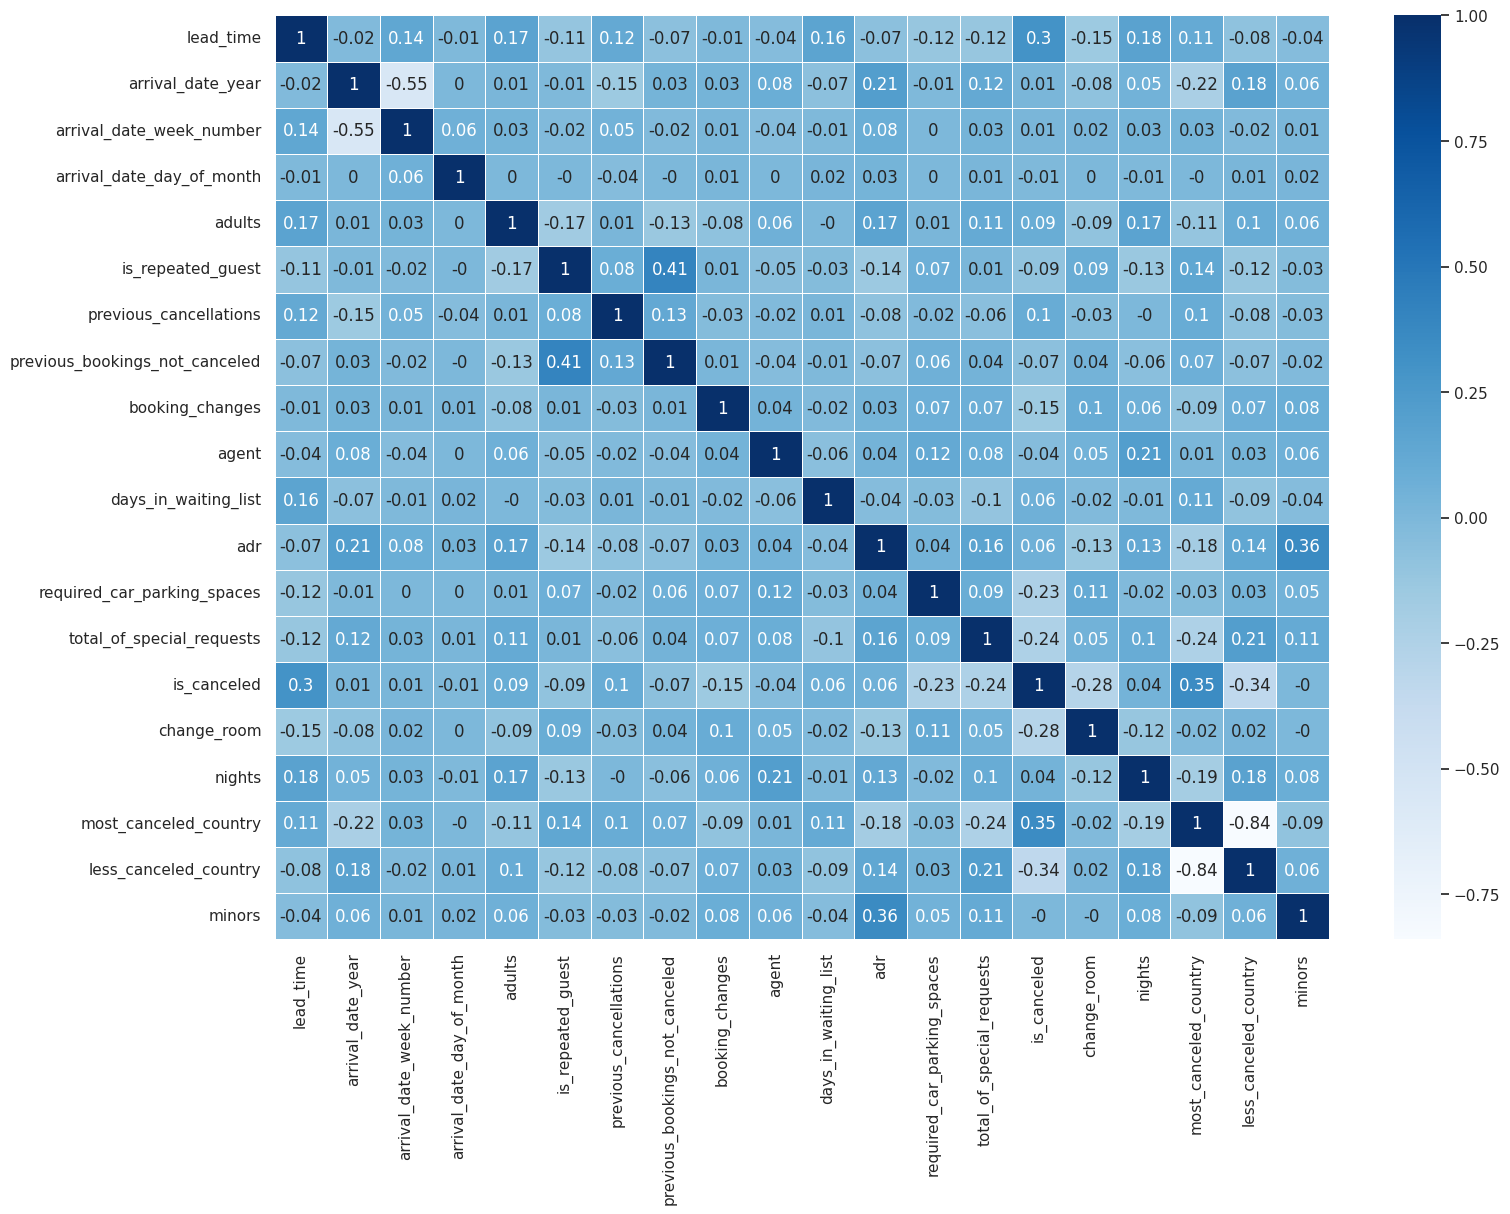

In [55]:
target_column = 'is_canceled'

columnas_numericas = data.select_dtypes(include=['int64', 'float64'])
nuevo_df = data[columnas_numericas.columns]

plt.figure(figsize=(17, 12))
correlacion = nuevo_df.corr()

sns.heatmap(correlacion.round(2), annot=True, cmap='Blues', linewidths=0.5)

plt.show()



# Exportamos a un archivo csv

In [56]:
data.to_csv('./Datasets/dataset_modificado.csv', index=False)
data_test.to_csv('./Datasets/data_test.csv', index=False)